In [208]:
#Creating Baseline using Nearest Means Classifier

In [190]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
data_train = pd.read_csv('mushroom_train.csv', usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
data_new_train = data_train.to_numpy()

In [192]:
#categorical_col = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
categorical_col = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season','class']
categorical_data_train = data_train[categorical_col]
encoded_data_train = pd.get_dummies(categorical_data_train, prefix = categorical_col, prefix_sep='_')

In [193]:
numerical_col_train = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
numerical_col_scaled_train = scaler.fit_transform(numerical_col_train)
numerical_data_train = pd.DataFrame(numerical_col_scaled_train)
print(numerical_data_train)

              0         1         2
0     -0.332216 -0.161276 -0.590488
1     -0.742182 -0.274093 -0.856362
2      0.905345  0.132642  1.316604
3      0.393845 -0.636294  0.149160
4      0.160126  0.542345  0.631930
...         ...       ...       ...
42743 -0.657890 -0.481913 -0.860360
42744  0.420665 -0.585823 -0.099722
42745  7.495450 -0.247373  1.423554
42746  0.803811  0.287022  1.225648
42747 -0.824558 -0.909429 -0.840369

[42748 rows x 3 columns]


In [194]:
final_data_train = pd.concat([numerical_data_train, encoded_data_train], axis = 1)
final_array_train = final_data_train.to_numpy()
print(final_array_train)

[[-0.3322158  -0.16127588 -0.5904883  ...  0.          0.
   1.        ]
 [-0.74218167 -0.27409266 -0.85636181 ...  0.          0.
   1.        ]
 [ 0.90534474  0.13264151  1.31660445 ...  1.          1.
   0.        ]
 ...
 [ 7.4954504  -0.2473729   1.42355358 ...  0.          1.
   0.        ]
 [ 0.80381114  0.28702237  1.22564772 ...  1.          1.
   0.        ]
 [-0.82455799 -0.90942926 -0.84036942 ...  0.          0.
   1.        ]]


In [195]:
print(final_array_train.dtype)
print(final_array_train.shape)
print(data_new_train.shape)

float64
(42748, 94)
(42748, 16)


In [196]:
X_train = final_array_train[:,:-1]
Y_train = final_array_train[:,-1]

In [197]:
clf = NearestCentroid()  #Nearest Means Classifier
clf.fit(X_train,Y_train)

NearestCentroid()

In [198]:
#Test Dataset
data_test = pd.read_csv('mushroom_test.csv', usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
data_new_test = data_test.to_numpy()
print(data_new_test.shape)

(18321, 16)


In [199]:
categorical_data_test = data_test[categorical_col]
encoded_data_test = pd.get_dummies(categorical_data_test, prefix = categorical_col, prefix_sep='_')
print(encoded_data_test.shape)

(18321, 91)


In [200]:
numerical_col_test = data_test.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
numerical_col_scaled_test = scaler.fit_transform(numerical_col_test)
print(numerical_col_scaled_test.shape)

(18321, 3)


In [201]:
numerical_data_test = pd.DataFrame(numerical_col_scaled_test)
final_data_test = pd.concat([numerical_data_test, encoded_data_test], axis = 1)
final_array_test = final_data_test.to_numpy()

In [202]:
print(final_array_test.dtype)
print(final_array_test.shape)
print(data_new_test.shape)

float64
(18321, 94)
(18321, 16)


In [203]:
X_test = final_array_test[:,:-1]
Y_test = final_array_test[:, -1]

In [204]:
Y_pred = clf.predict(X_test)

In [205]:
accuracy = clf.score(X_test,Y_test)
print("Accuracy is:{:.4f}%".format(accuracy*100))

Accuracy is:81.7859%


In [206]:
f1 = f1_score(Y_test,Y_pred)
print(f1)

0.8342192856078294


Text(0.5, 1.0, 'Confusion Matrix')

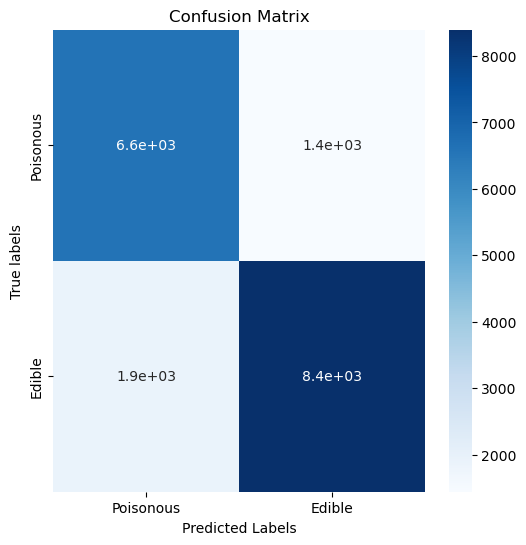

In [207]:
cm = confusion_matrix(Y_test, Y_pred)
classes = ['Poisonous', 'Edible']
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [161]:
#Standardize entire array - numerical and one-hot encoded

In [162]:
scaler = StandardScaler()
final_array_train_whole = final_array_train[:,:-1]
X_train_whole = scaler.fit_transform(final_array_train_whole)

In [163]:
scaler = StandardScaler()
final_array_test_whole = final_array_test[:,:-1]
X_test_whole = scaler.fit_transform(final_array_test_whole)

In [164]:
clf1 = NearestCentroid()  #Nearest Means Classifier
clf1.fit(X_train_whole,Y_train)

NearestCentroid()

In [165]:
Y_pred_whole = clf1.predict(X_test_whole)

In [166]:
accuracy_test = clf1.score(X_test_whole,Y_test)
print("Accuracy is:{:.4f}%".format(accuracy_test*100))

Accuracy is:93.6466%
